 # Task 6 - Part 1: Time Series Sales Forecasting with ARIMA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

## Load Dataset

In [8]:
data = pd.read_csv("D:/sales_data.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)
data = data.asfreq("D") 

## Visualization

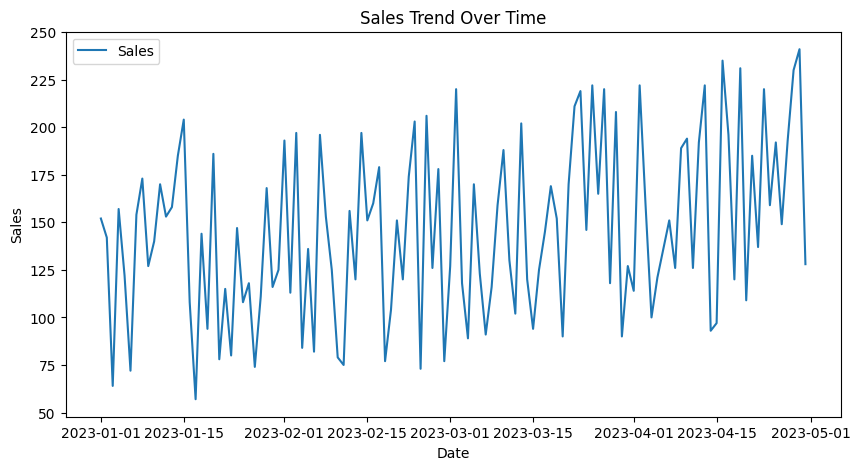

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data["Sales"], label="Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Train/Test Split

In [10]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

## ARIMA Model

In [11]:
model = ARIMA(train, order=(2,1,2)) 
fitted_model = model.fit()

C:\Users\Fathima Zuhaina\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Forecast

In [12]:
forecast = fitted_model.forecast(steps=len(test))

## Evaluation

In [13]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 56.32138554818638


## Plot Forecast

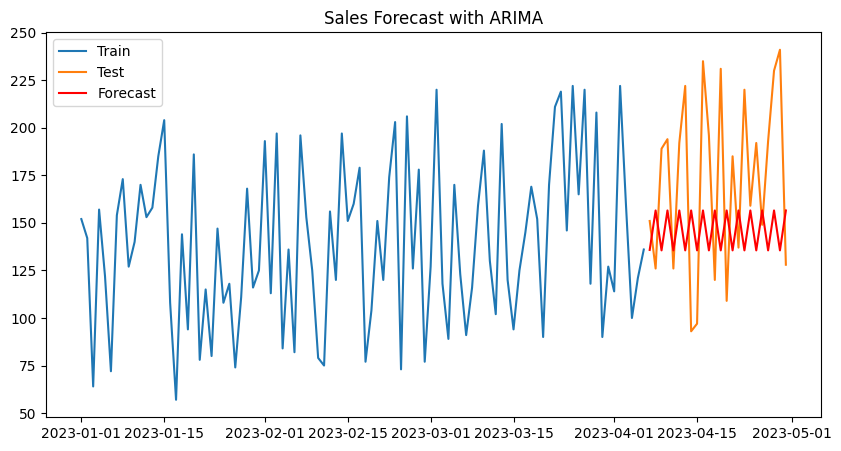

In [14]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("Sales Forecast with ARIMA")
plt.legend()
plt.show()

# Task 6 - Part 2: Heart Disease Prediction using Logistic Regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load Dataset

In [16]:
data = pd.read_csv("D:/heart_disease.csv")

## Encode Gender 

In [17]:
data["Gender"] = data["Gender"].map({"Male":1, "Female":0})

## Features & Target

In [18]:
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

## Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Scaling

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## Predictions